<a href="https://colab.research.google.com/github/GonzaloPerezGomez/Pytorch/blob/main/04_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets

User your own data in PyTorch

## 0. Setup libraries and base code

In [2]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import torchvision

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


## 1. Get data

Our dataset is a subset of Food101 from torchvision



In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

if not image_path.is_dir():
  image_path.mkdir(parents=True, exist_ok=True)

In [7]:
# Download data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f"Downloading data...")
  f.write(request.content)

# Unzip the data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unziping data")
  zip_ref.extractall(image_path)

Unziping data


## 2. Becoming one with the data

In [12]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filesnames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filesnames)} images in {dirpath}")

In [13]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi


In [14]:
# Setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

### 2.1 Visualizing and image

data/pizza_steak_sushi/test/sushi/479711.jpg
sushi
Random image path: data/pizza_steak_sushi/test/sushi/479711.jpg | Image class: sushi | Image height: 512 | Image width: 512


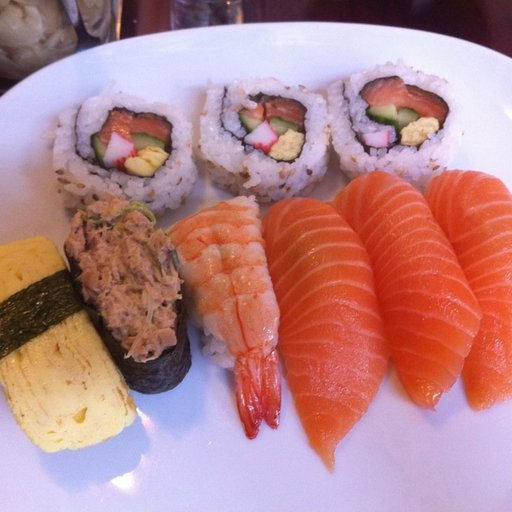

In [36]:
import random
from PIL import Image

random.seed(42)

# 1. Get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get the image class from the path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path} | Image class: {image_class} | Image height: {img.height} | Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

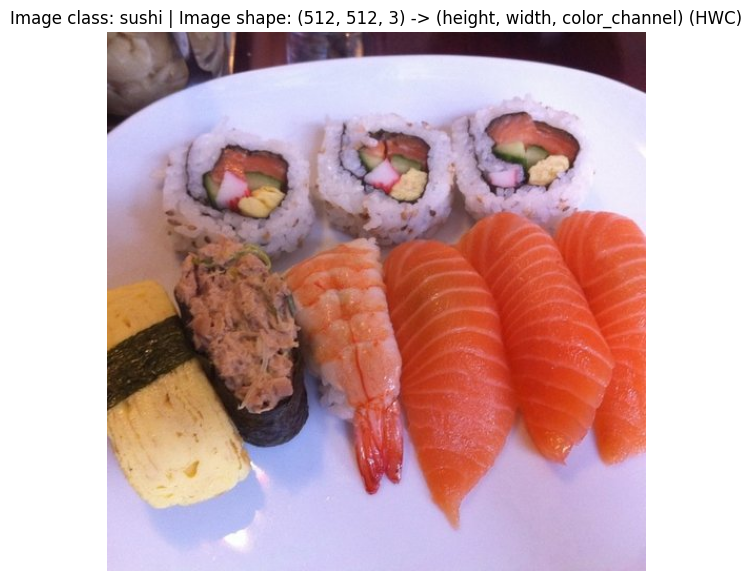

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Turn image into array
img_as_array = np.asanyarray(img)

# Plot it
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> (height, width, color_channel) (HWC)")
plt.axis(False)